In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Top-50-musicality-global.csv')
df = df.rename(columns={'Unnamed: 0': 'Rank'})
df.head()

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [3]:
# Check null values

pd.isnull(df).sum()

Rank                0
Country             0
Track Name          6
Artist Name         6
Album Name          6
Popularity          0
Date                0
Markets             0
Danceability        0
Acousticness        0
duration            0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
TSignature          0
Positiveness        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3589 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


In [5]:
# 10 least popular songs

sorted_df = df.sort_values('Popularity', ascending = True).head(10)
sorted_df

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
892,892,ECU,NaN,NaN,NaN,0,0000,None,0.716,0.0124,...,0.824,0.0000,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
3524,3524,VEN,NaN,NaN,NaN,0,0000,None,0.730,0.0232,...,0.792,0.0000,0,0.0699,-4.643,1,0.0517,90.019,4,0.533
3486,3486,URY,Besos con Fernet,Rusherking,Besos con Fernet,0,2023-11-07,AR,0.742,0.1790,...,0.692,0.0000,11,0.1880,-3.687,1,0.0469,100.030,4,0.897
586,586,CHL,NaN,NaN,NaN,0,0000,None,0.716,0.0124,...,0.824,0.0000,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
747,747,CRI,NaN,NaN,NaN,0,0000,None,0.716,0.0124,...,0.824,0.0000,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
1069,1069,ESP,NaN,NaN,NaN,0,0000,None,0.716,0.0124,...,0.824,0.0000,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
2340,2340,MAR,DELLALI (feat. Hamza),ElGrandeToto,DELLALI (feat. Hamza),0,2023-11-08,AR,0.572,0.6970,...,0.565,0.0000,1,0.1690,-7.664,0,0.1730,96.246,4,0.152
997,997,SLV,NaN,NaN,NaN,0,0000,None,0.716,0.0124,...,0.824,0.0000,0,0.0906,-4.588,1,0.0497,89.991,4,0.541
3198,3198,CHE,Liebe Grüsse,RAF Camora,XV RR Edition,3,2023-09-08,AR,0.796,0.1790,...,0.865,0.0114,9,0.0852,-6.760,0,0.0801,130.012,4,0.768
580,580,CHL,Una en un Millón,Jere Klein,Una en un Millón,7,2023-05-18,AR,0.672,0.0110,...,0.707,0.0000,2,0.1130,-6.430,0,0.0577,99.979,4,0.477


In [6]:
# New Table for Top 50 Global

df_fifty = df[:50]
df_fifty.tail()

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
45,45,Global,Now And Then,The Beatles,Now And Then,84,2023-11-02,AR,0.442,0.2380,...,0.605,0.000064,4,0.307,-4.639,0,0.0284,87.194,4,0.358
46,46,Global,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd,The Idol Episode 4 (Music from the HBO Origina...,90,2023-06-23,AR,0.522,0.0545,...,0.641,0.000000,8,0.162,-6.287,1,0.0318,87.510,4,0.202
47,47,Global,EL AMOR DE SU VIDA,Grupo Frontera,El Comienzo,90,2023-08-25,AR,0.616,0.0600,...,0.834,0.000000,9,0.338,-3.069,1,0.0664,151.701,4,0.746
48,48,Global,Hate You,Jung Kook,GOLDEN,84,2023-11-03,AR,0.419,0.8620,...,0.274,0.000000,2,0.092,-9.321,1,0.0314,79.595,4,0.250
49,49,Global,FINA,Bad Bunny,nadie sabe lo que va a pasar mañana,93,2023-10-13,AR,0.847,0.0869,...,0.724,0.000001,1,0.118,-5.410,1,0.2980,94.601,4,0.396


In [7]:
df_fifty.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,50.0,24.500000,14.577380,0.000000,12.250000,24.500000,36.750000,49.000
Popularity,50.0,92.260000,4.439204,82.000000,90.000000,93.000000,95.000000,100.000
Danceability,50.0,0.657500,0.137168,0.419000,0.546750,0.654000,0.779000,0.911
Acousticness,50.0,0.281950,0.291484,0.000418,0.063050,0.178000,0.363000,0.969
duration,50.0,196977.840000,40148.814813,125040.000000,168676.750000,194693.500000,228907.500000,279833.000
Energy,50.0,0.631982,0.172986,0.091100,0.526750,0.678500,0.737750,0.944
Instrumentalness,50.0,0.012644,0.046039,0.000000,0.000000,0.000003,0.000155,0.267
Key,50.0,4.940000,3.501661,0.000000,2.000000,5.000000,8.000000,11.000
Liveness,50.0,0.179216,0.130146,0.060300,0.095975,0.126000,0.215500,0.641
Loudness,50.0,-6.666560,3.004104,-17.665000,-8.301500,-6.143500,-4.833000,-2.248


In [8]:
# Top 10 songs greater than 90

most_pop = df_fifty.query('Popularity>90', inplace = False).sort_values('Popularity', ascending = False)
most_pop[:10]

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.7330,0.000000,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.4210,0.000000,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
7,7,Global,Cruel Summer,Taylor Swift,Lover,99,2019-08-23,AR,0.552,0.1170,...,0.7020,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564
8,8,Global,MONACO,Bad Bunny,nadie sabe lo que va a pasar mañana,98,2023-10-13,AR,0.787,0.1500,...,0.6210,0.000402,4,0.5800,-5.009,0,0.0680,139.056,4,0.130
10,10,Global,Strangers,Kenya Grace,Strangers,98,2023-09-01,AR,0.628,0.7010,...,0.5230,0.002740,11,0.2190,-8.307,0,0.0946,169.982,4,0.416
20,20,Global,LALA,Myke Towers,LA VIDA ES UNA,97,2023-03-23,AR,0.708,0.0739,...,0.7370,0.001620,1,0.0955,-4.045,1,0.0436,91.986,4,0.607
5,5,Global,PERRO NEGRO,Bad Bunny,nadie sabe lo que va a pasar mañana,97,2023-10-13,AR,0.911,0.0887,...,0.7780,0.000022,5,0.1790,-2.248,1,0.2620,96.057,4,0.345
9,9,Global,My Love Mine All Mine,Mitski,The Land Is Inhospitable and So Are We,97,2023-09-15,AR,0.504,0.8680,...,0.3080,0.135000,9,0.1580,-14.958,1,0.0321,113.950,4,0.121
23,23,Global,Daylight,David Kushner,Daylight,95,2023-04-14,AR,0.508,0.8300,...,0.4300,0.000441,2,0.0930,-9.475,0,0.0335,130.090,4,0.324
29,29,Global,What Was I Made For? [From The Motion Picture ...,Billie Eilish,What Was I Made For? [From The Motion Picture ...,95,2023-07-13,AR,0.444,0.9590,...,0.0911,0.000001,0,0.0980,-17.665,1,0.0307,78.403,4,0.142


In [9]:
df_fifty.set_index("Date", inplace=True)
df_fifty.head()

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Markets,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
Date,,,,,,,,,,,,,,,,,,,,
2023-11-03,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,AR,0.711,0.0447,206020,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
2023-09-15,1,Global,greedy,Tate McRae,greedy,100,AR,0.750,0.2560,131872,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2022-09-23,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,AR,0.537,0.8270,184061,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
2023-11-03,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,AR,0.790,0.3120,183551,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
2023-10-26,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,AR,0.596,0.0504,229478,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [10]:
df_fifty[['Artist Name']].iloc[18]

Artist Name    Arctic Monkeys
Name: 2013-09-09, dtype: object

In [11]:
# Change duration of track from ms to s

df_fifty['duration']=df_fifty['duration'].apply(lambda x: round(x/1000))
df_fifty.duration.head()

/var/folders/9f/z1j27l6n039g5q9tk3qxysx80000gn/T/ipykernel_1863/640385410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifty['duration']=df_fifty['duration'].apply(lambda x: round(x/1000))


Date
2023-11-03    206
2023-09-15    132
2022-09-23    184
2023-11-03    184
2023-10-26    229
Name: duration, dtype: int64

In [12]:
df_fifty.head()

,Rank,Country,Track Name,Artist Name,Album Name,Popularity,Markets,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
Date,,,,,,,,,,,,,,,,,,,,
2023-11-03,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,AR,0.711,0.0447,206,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
2023-09-15,1,Global,greedy,Tate McRae,greedy,100,AR,0.750,0.2560,132,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2022-09-23,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,AR,0.537,0.8270,184,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
2023-11-03,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,AR,0.790,0.3120,184,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
2023-10-26,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,AR,0.596,0.0504,229,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


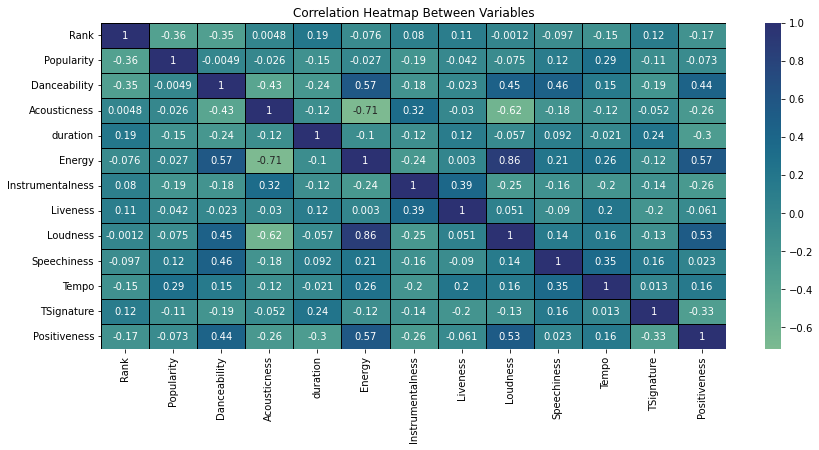

In [13]:
corr_df = df_fifty.drop(["Key", "Mode"], axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, center=0, cmap='crest', linewidths=1, linecolor='Black')
plt.title("Correlation Heatmap Between Variables")  # Corrected line
plt.xticks(rotation=90)  # Corrected line
plt.show()

In [14]:
# Off the visual can see huge correlation between Energy/Loudness and Positiveness/Energy 
# as well as high negative correlation between Energy/Acousticness and Acousticness/Loudness
# the more energy the louder the music and more positiveness but less acousticness

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

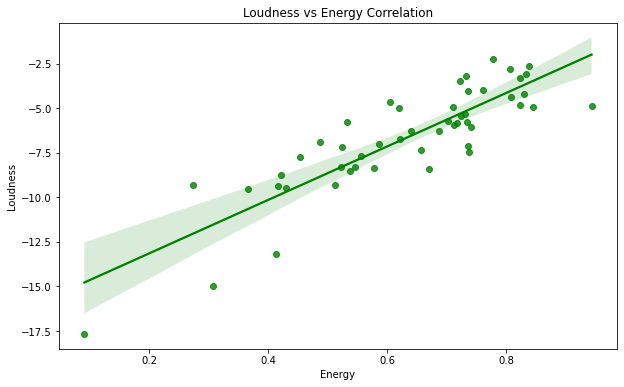

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_fifty, y = "Loudness", x = "Energy", color = "g").set(title = "Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

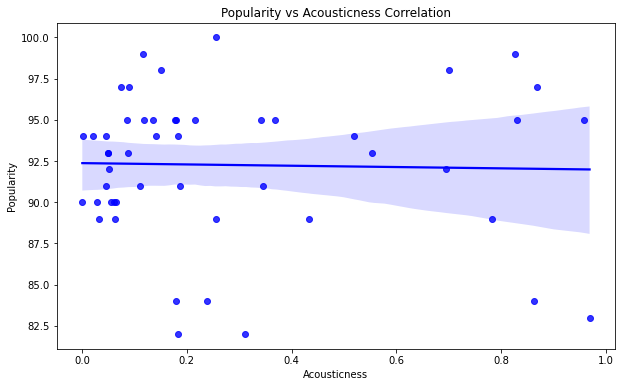

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_fifty, y = "Popularity", x = "Acousticness", color = "b").set(title = "Popularity vs Acousticness Correlation")

[Text(0.5, 1.0, 'Energy vs Acousticness Correlation')]

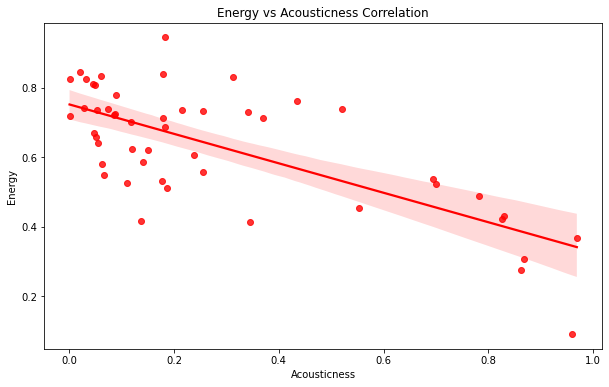

In [17]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_fifty, y = "Energy", x = "Acousticness", color = "r").set(title = "Energy vs Acousticness Correlation")

[Text(0.5, 1.0, 'Energy vs Loudness Correlation')]

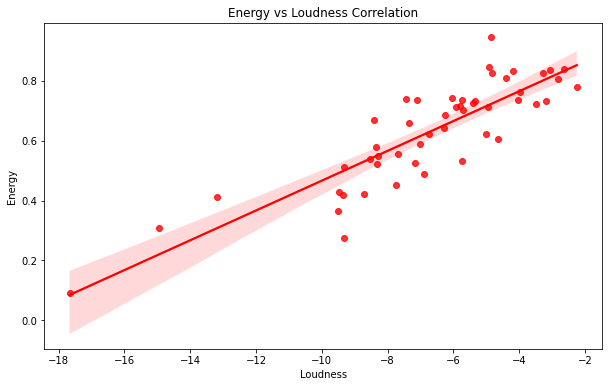

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_fifty, y = "Energy", x = "Loudness", color = "r").set(title = "Energy vs Loudness Correlation")

[Text(0.5, 1.0, 'Energy vs Loudness Correlation')]

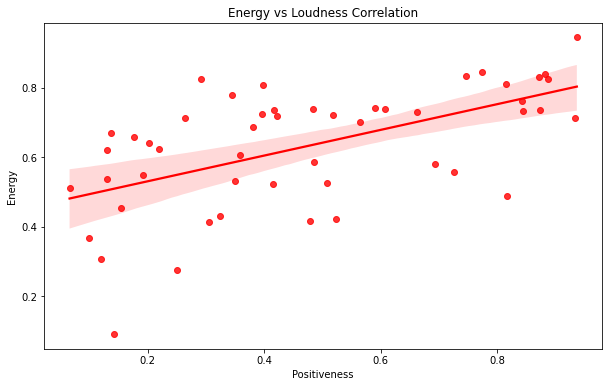

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_fifty, y = "Energy", x = "Positiveness", color = "r").set(title = "Energy vs Loudness Correlation")

In [20]:
df_fifty['dates']=df_fifty.index.get_level_values('Date')
df_fifty.dates=pd.to_datetime(df_fifty.dates)
months=df_fifty.dates.dt.month

/var/folders/9f/z1j27l6n039g5q9tk3qxysx80000gn/T/ipykernel_1863/2197971905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifty['dates']=df_fifty.index.get_level_values('Date')
/var/folders/9f/z1j27l6n039g5q9tk3qxysx80000gn/T/ipykernel_1863/2197971905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifty.dates=pd.to_datetime(df_fifty.dates)


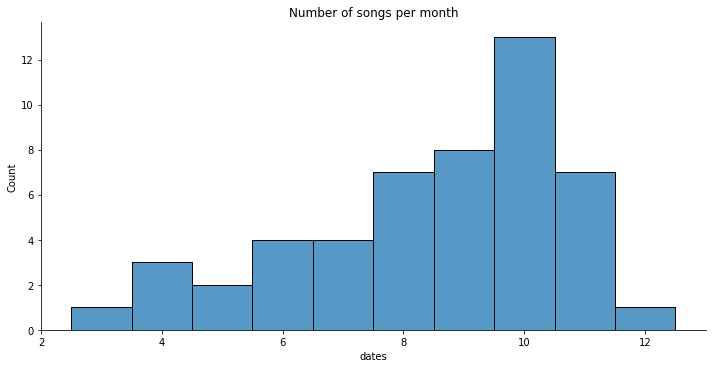

In [21]:
sns.displot(months, discrete=True, aspect=2, height=5, kind="hist").set(title="Number of songs per month")

In [22]:
# majorirty of songs that end up on Global 50 by end of year released in the 4 months prior.

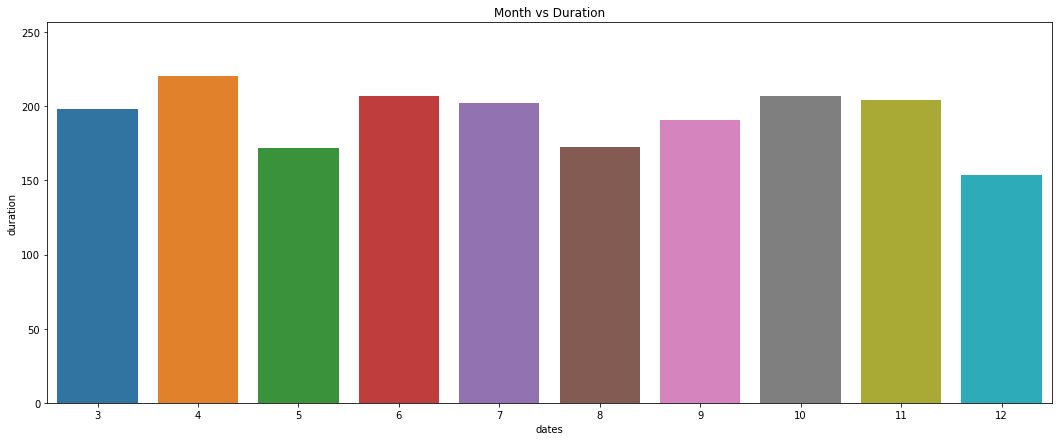

In [23]:
total_dr = df_fifty.duration
fig_dims = (18, 7)
fig, ax = plt.subplots(figsize = fig_dims)
fi = sns.barplot(x = months, y = total_dr, ax = ax, errwidth = False).set(title= "Month vs Duration")
#plt.xticks(rotation=90)

In [26]:
# 11/28 requested data from Spotify to analyze my personal music catalogue for the year